# Лабораторна робота №2 "EDA and Supervised Learning"
### Виконала:
Студентка групи ДА-01 <br>
ННК «ІПСА» <br>
Борисенко Є.А. <br>
### Мета роботи:
навчитись робити розвідку даних (Exploratory Data Analysis - EDA) та використовувати інструменти для моделювання при навчанні з вчителем (Supervised Learning).
### Завдання:
- Прочитати опис та викачати дані з Kaggle змагання https://www.kaggle.com/c/home-credit-default-risk/data. Опис колонок знаходиться у файлі HomeCredit_columns_description.csv.
- Для лабораторної роботи достатньо працювати лише з таблицями “application_{train|test}.csv”. З’єднувати інші таблиці не потрібно.
- Провести EDA на таблицях “application_{train|test}.csv”: про що ці дані, які розподіли колонок, скільки missing values, наскільки збалансовані дані, яким чином обробити missing values, чим відрізняються train/test, ...?
- Побудувати класифікатор на основі проаналізованих даних. Дозволяється використати будь-який з відомих Вам методів (наприклад за допомогою https://scikit-learn.org/stable/supervised_learning.html). Для оцінки якості натренованої моделі використати train-val-split, тобто відкласти частину “application_train.csv” для валідації. Метрика - ROC_AUC.
- Класифікувати дані з файла application_test.csv, записати результат в submission файл за прикладом “sample_submission.csv”. 
- Залити submission файл на платформу в “Leaderboard”->“Late Submission”, отримати результат - оцінку, зробити знімок екрану і додати його до фінального ноутбука.


### Хід роботи:

#### Імпорт білбліотек та завантаження даних

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

#### Univariable analysis

In [2]:
print(train_data.shape)
print(test_data.shape)
train_data.head()

(307511, 122)
(48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_data.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
150542,274518,0,Cash loans,F,N,Y,0,157500.0,1354500.0,35730.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [4]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_data.sample()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
19494,241793,Cash loans,F,N,Y,0,67500.0,145957.5,14346.0,126000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


#### Handling Tyes of Features

In [6]:
train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
test_data.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

##### Категоріальні фічі
Знайдемо всі категоріалні фічі. По-перше, це є всі фічі, що мають тип object.

In [8]:
categorical_features = train_data.select_dtypes(include=["object"]).columns.tolist()
categorical_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

Не всі колонки, що приймають чисельні значення є чисельними змінними. Додама до категоріальних фіч всі колонки, що містять в назві слово FLAG, оскільки з опису даних зрозуміло, що це категоріальні фічі.

In [9]:
flag_features = train_data.filter(like='FLAG').columns.tolist()

for feature in flag_features:
    if feature not in categorical_features:
        categorical_features.append(feature)
    
categorical_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Вручну додаємо інші категоріальні фічі. Перетворюмо всі знайдені фічі в категоріальний тип даних.

In [10]:
categorical_features_manual = ["REGION_RATING_CLIENT",
                                "REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION",
                                "REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",
                                "REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY",
                                "LIVE_CITY_NOT_WORK_CITY"]
for feature in categorical_features_manual:
    if feature not in categorical_features:
        categorical_features.append(feature)
        
for feature in categorical_features:
    train_data[feature] = train_data[feature].astype("category")
    test_data[feature] = train_data[feature].astype("category")
    
categorical_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NO

In [11]:
train_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 122, dtype: object

In [12]:
test_data.dtypes

SK_ID_CURR                       int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
FLAG_OWN_REALTY               category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 121, dtype: object

###### Чисельні фічі

In [13]:
numerical_features =  train_data.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'AP

#### Missing data
Дізнаємось скільки рядків мають missing values для кожної з фіч

In [14]:
train_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Співвідношення missing values до загальної кількості:

In [15]:
missing_percentages = train_data.isna().mean() * 100
missing_percentages

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

Відсортуємо для наглядності:

In [16]:
missing_percentages.sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [17]:
missing_percentages_test = test_data.isna().mean() * 100
missing_percentages_test.sort_values(ascending=False)

COMMONAREA_AVG              68.716150
COMMONAREA_MODE             68.716150
COMMONAREA_MEDI             68.716150
NONLIVINGAPARTMENTS_AVG     68.412523
NONLIVINGAPARTMENTS_MODE    68.412523
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 121, dtype: float64

Позбудемось фіч, які мають більше 20% пропущених значень

In [18]:
cols_to_drop = missing_percentages[missing_percentages > 20].index
cols_to_drop 

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [19]:
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)
train_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 72, dtype: object

#### Duplicates

In [20]:
test_data.duplicated().sum()

0

In [21]:
train_data.duplicated().sum()

0

Дупликатів немає

#### Сбалансованість даних

In [22]:
train_data['TARGET'].value_counts() * 100 / train_data['TARGET'].shape[0]

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

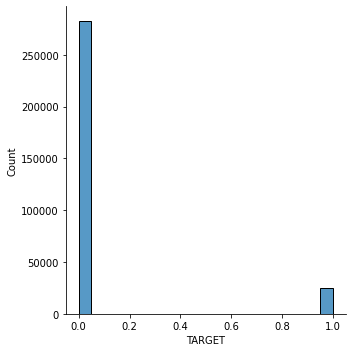

In [23]:
sns.displot(train_data['TARGET'], kde=False);

Дані не збаласовані

#### Статистичні дані:

In [24]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [25]:
test_data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48715.000000,48715.000000,48715.000000,48744.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.143652,1.435738,0.101139,-1077.766228,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.514413,3.580125,0.403791,878.920740,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.000000,0.000000,-4361.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.000000,0.000000,-1766.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.000000,0.000000,-863.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,2.000000,0.000000,-363.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,34.000000,351.000000,24.000000,0.000000,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [26]:
train_data.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.0,307511.0,307511.0,307511.0,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,305011.0,307328.0,307355.0,307408.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,NaN,NaN,NaN,NaN,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,NaN,NaN,NaN,NaN,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [27]:
test_data.describe(include="all")

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.0,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,44137,32002,32131,33818,NaN,NaN,NaN,NaN,NaN,...,48333.0,48709.0,48719.0,48726.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,NaN,NaN,NaN,NaN,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,NaN,NaN,NaN,NaN,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


#### Аналіз категоріальних змінних:

Кількість унікальних значень для категоріальної фічі та процент кожного унікального значення:

In [28]:
categorical_features = train_data.select_dtypes(include=["category"]).columns
len(categorical_features)

45

In [29]:
categorical_features = train_data.select_dtypes(include=["category"]).columns
cat_counts = {}

for col in categorical_features:
    # cardinality, unique counts, and percentage of each unique value
    cardinality = len(train_data[col].unique())
    unique_counts = train_data[col].value_counts().to_dict()
    percentage = train_data[col].value_counts(normalize=True).mul(100).round(2).to_dict()
    cat_counts[col] = {'Cardinality': cardinality, 'Unique Counts': unique_counts, 'Percentage': percentage}

cat_counts_df = pd.DataFrame.from_dict(cat_counts, orient='index')

(
    cat_counts_df
    .head(cat_counts_df.shape[0])
    .style.set_properties(**{'text-align': 'center'})
)

,Cardinality,Unique Counts,Percentage
NAME_CONTRACT_TYPE,2,"{'Cash loans': 278232, 'Revolving loans': 29279}","{'Cash loans': 90.48, 'Revolving loans': 9.52}"
CODE_GENDER,3,"{'F': 202448, 'M': 105059, 'XNA': 4}","{'F': 65.83, 'M': 34.16, 'XNA': 0.0}"
FLAG_OWN_CAR,2,"{'N': 202924, 'Y': 104587}","{'N': 65.99, 'Y': 34.01}"
FLAG_OWN_REALTY,2,"{'Y': 213312, 'N': 94199}","{'Y': 69.37, 'N': 30.63}"
NAME_TYPE_SUITE,8,"{'Unaccompanied': 248526, 'Family': 40149, 'Spouse, partner': 11370, 'Children': 3267, 'Other_B': 1770, 'Other_A': 866, 'Group of people': 271}","{'Unaccompanied': 81.16, 'Family': 13.11, 'Spouse, partner': 3.71, 'Children': 1.07, 'Other_B': 0.58, 'Other_A': 0.28, 'Group of people': 0.09}"
NAME_INCOME_TYPE,8,"{'Working': 158774, 'Commercial associate': 71617, 'Pensioner': 55362, 'State servant': 21703, 'Unemployed': 22, 'Student': 18, 'Businessman': 10, 'Maternity leave': 5}","{'Working': 51.63, 'Commercial associate': 23.29, 'Pensioner': 18.0, 'State servant': 7.06, 'Unemployed': 0.01, 'Student': 0.01, 'Businessman': 0.0, 'Maternity leave': 0.0}"
NAME_EDUCATION_TYPE,5,"{'Secondary / secondary special': 218391, 'Higher education': 74863, 'Incomplete higher': 10277, 'Lower secondary': 3816, 'Academic degree': 164}","{'Secondary / secondary special': 71.02, 'Higher education': 24.34, 'Incomplete higher': 3.34, 'Lower secondary': 1.24, 'Academic degree': 0.05}"
NAME_FAMILY_STATUS,6,"{'Married': 196432, 'Single / not married': 45444, 'Civil marriage': 29775, 'Separated': 19770, 'Widow': 16088, 'Unknown': 2}","{'Married': 63.88, 'Single / not married': 14.78, 'Civil marriage': 9.68, 'Separated': 6.43, 'Widow': 5.23, 'Unknown': 0.0}"
NAME_HOUSING_TYPE,6,"{'House / apartment': 272868, 'With parents': 14840, 'Municipal apartment': 11183, 'Rented apartment': 4881, 'Office apartment': 2617, 'Co-op apartment': 1122}","{'House / apartment': 88.73, 'With parents': 4.83, 'Municipal apartment': 3.64, 'Rented apartment': 1.59, 'Office apartment': 0.85, 'Co-op apartment': 0.36}"
FLAG_MOBIL,2,"{1: 307510, 0: 1}","{1: 100.0, 0: 0.0}"


Розподіли категоріальних фіч:

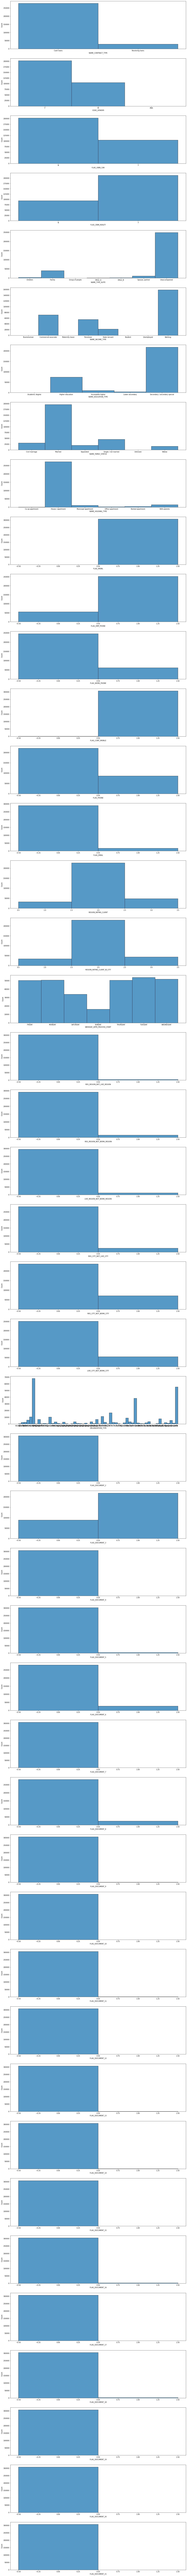

In [30]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(20, 300)
for i, col in enumerate(categorical_features):
    sns.histplot(train_data[col], kde=False, ax=axes[i])
plt.show()

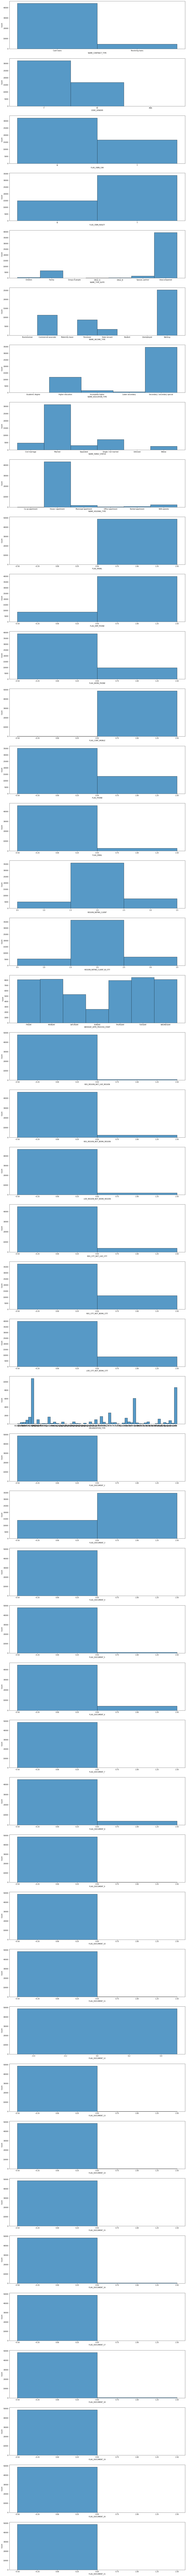

In [31]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(20, 300)
for i, col in enumerate(categorical_features):
    sns.histplot(test_data[col], kde=False, ax=axes[i])
plt.show()

#### Аналіз чисельних змінних

In [32]:
numerical_features = train_data.select_dtypes(exclude=["category"]).columns
len(numerical_features)

27

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>],
       [<AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_3'}>,
        <AxesSubplot:title={'center':'OBS_30_CNT_SOCIAL_CIRCLE'}>,
        <AxesSubplo

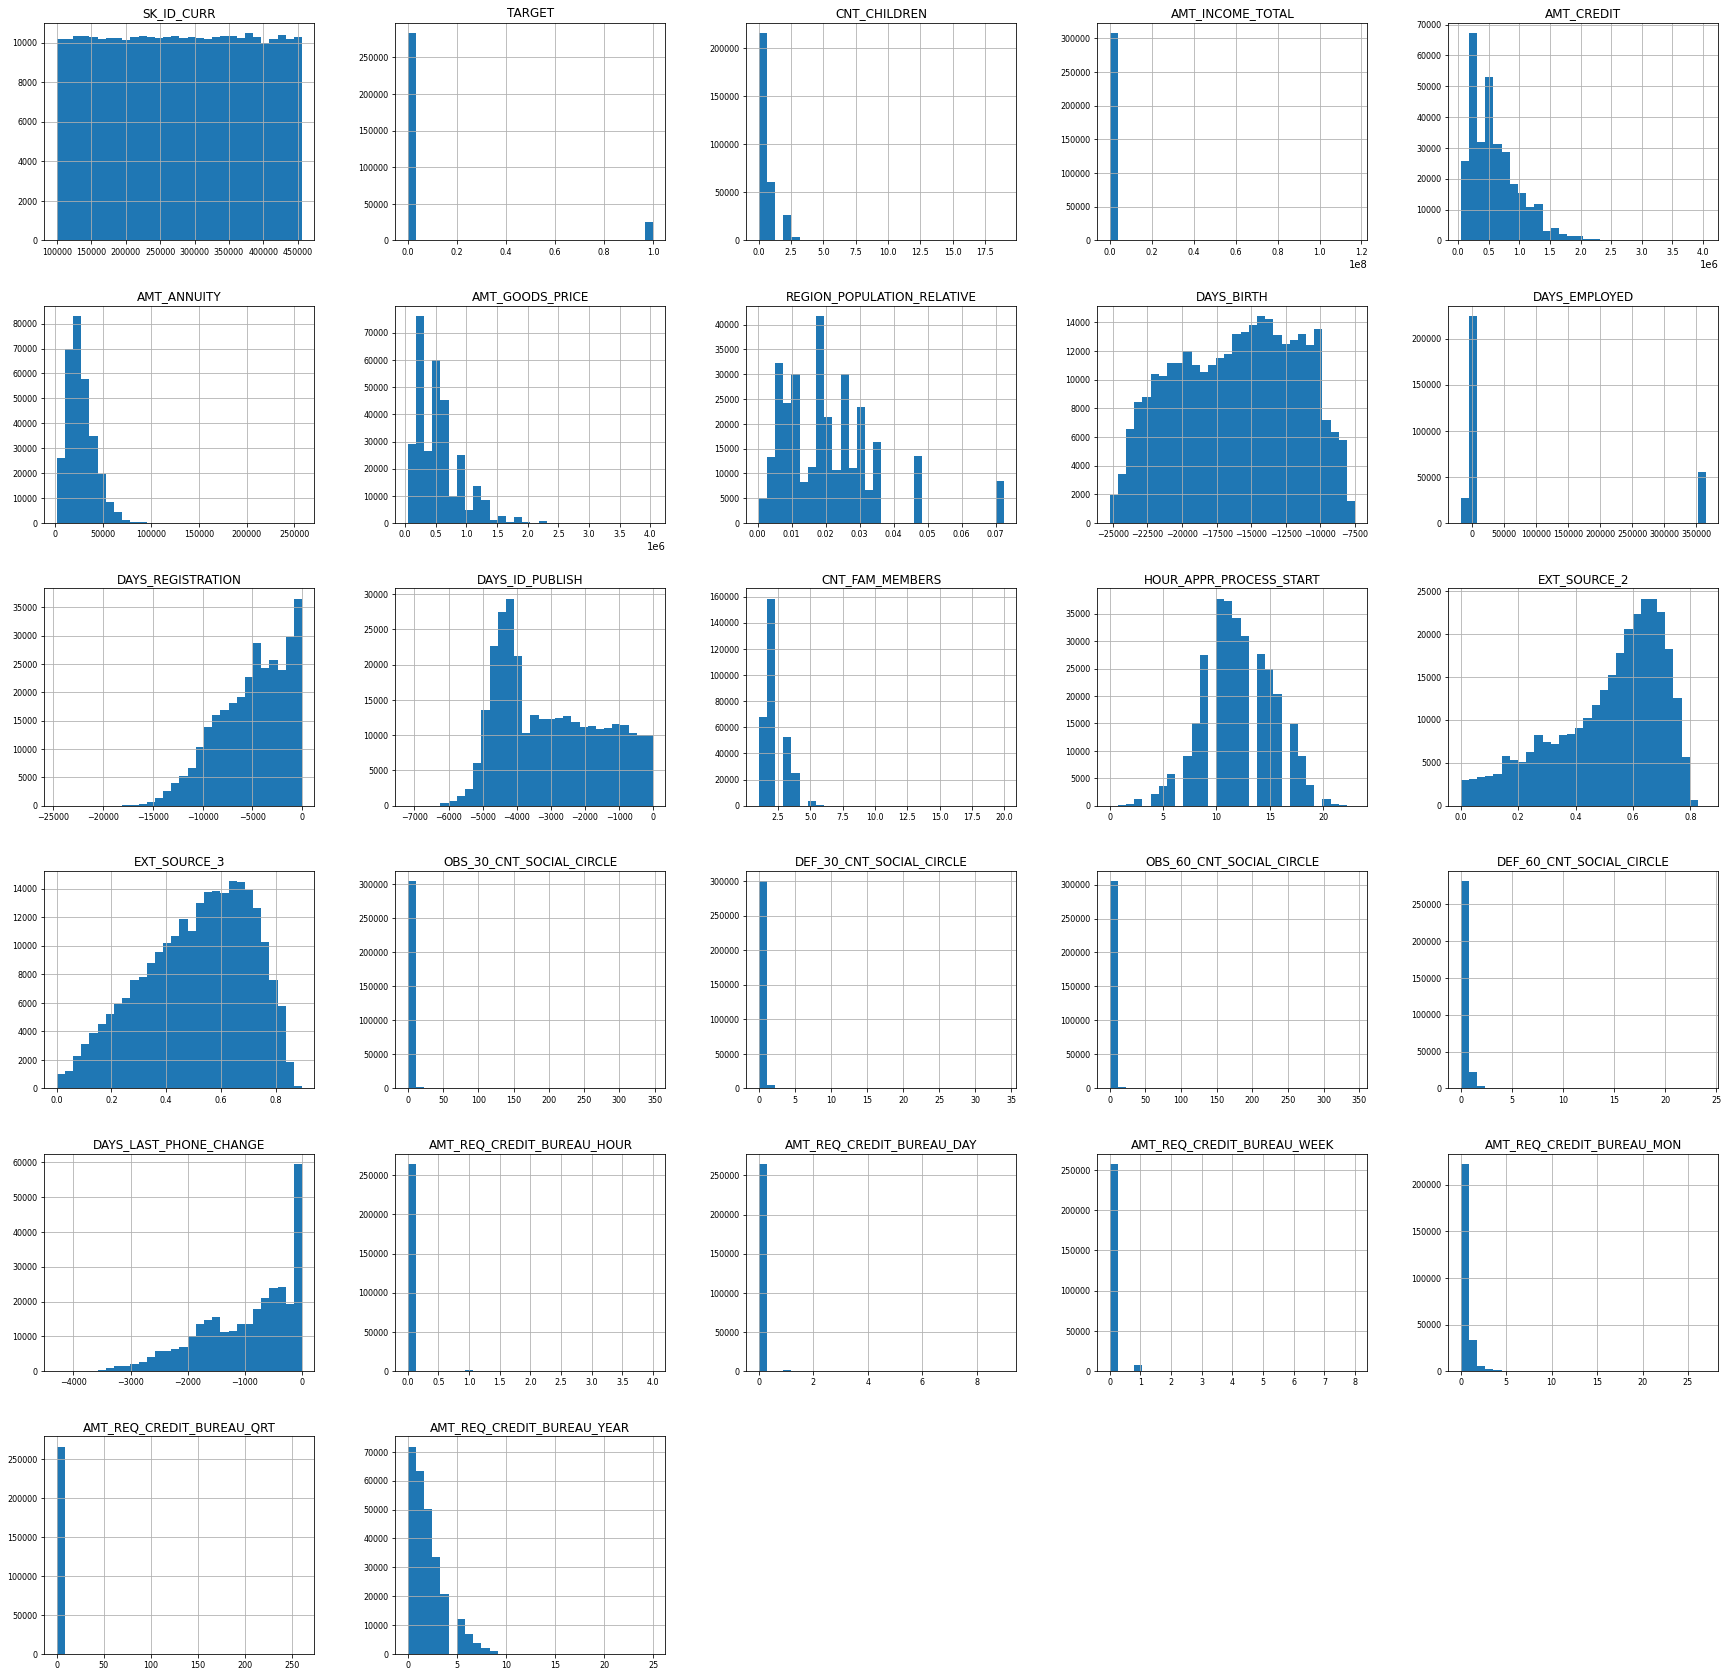

In [33]:
train_data[numerical_features].hist(figsize=(30, 30), bins=30, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>],
       [<AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>],
       [<AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_3'}>],
       [<AxesSubplot:title={'center':'OBS_30_CNT_SOCIAL_CIRCLE'}>,
        <AxesSubplot:title={'center':'DEF_30_CNT_SOCIAL_CIRCLE'}>,
 

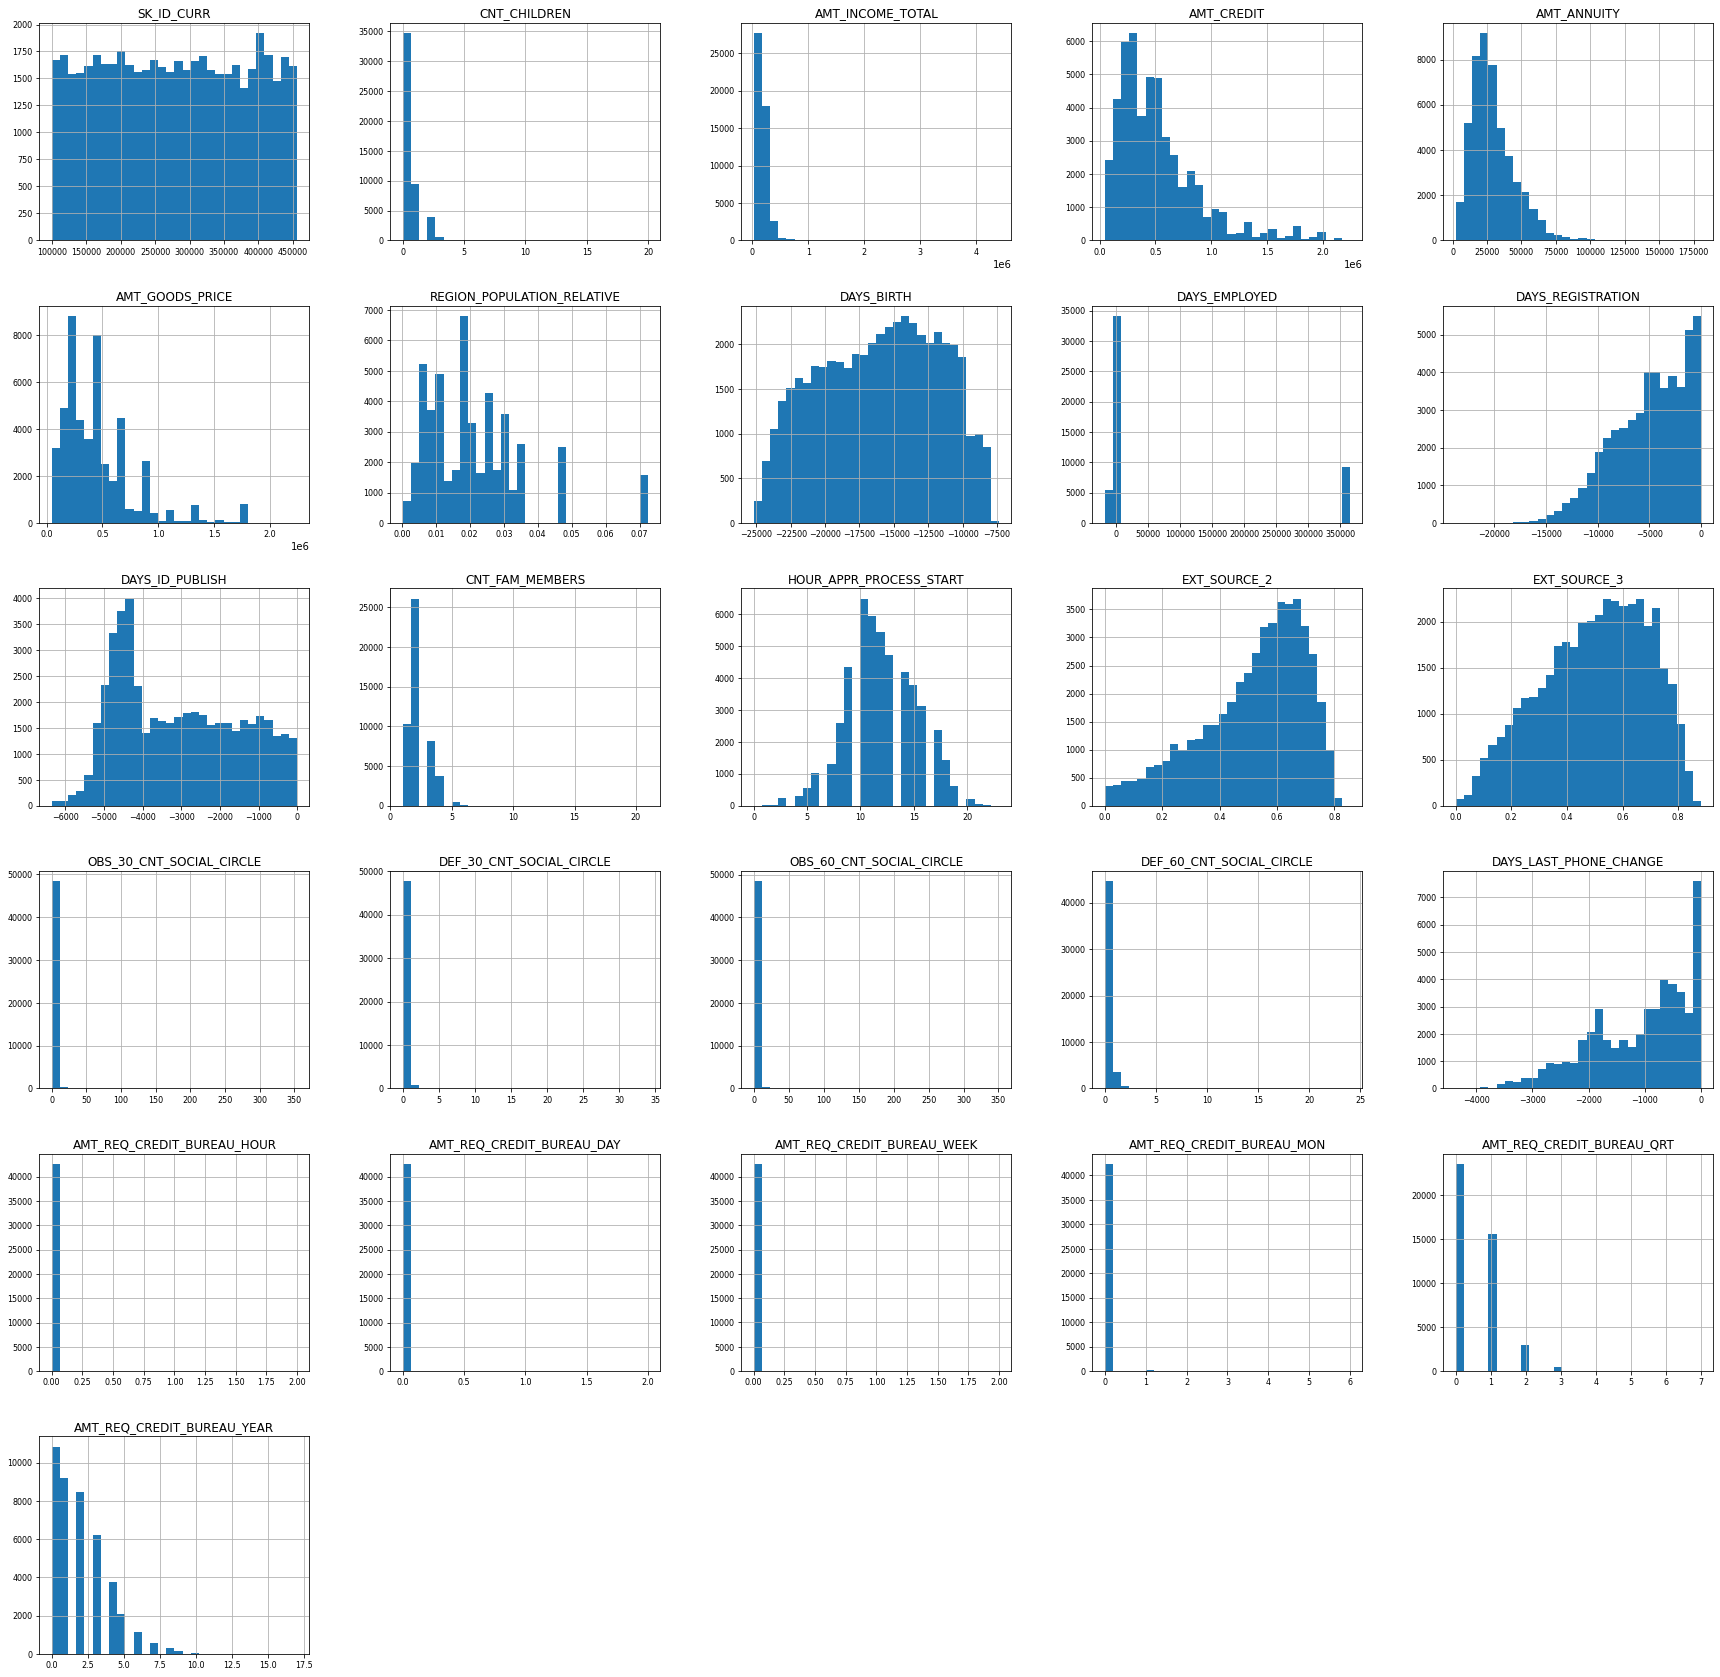

In [34]:
numerical_features = train_data.select_dtypes(exclude=["category"]).drop("TARGET", axis=1).columns
test_data[numerical_features].hist(figsize=(30, 30), bins=30, xlabelsize=8, ylabelsize=8)

In [35]:
train_data.select_dtypes(exclude=["category"]).median()

SK_ID_CURR                    278202.000000
TARGET                             0.000000
CNT_CHILDREN                       0.000000
AMT_INCOME_TOTAL              147150.000000
AMT_CREDIT                    513531.000000
AMT_ANNUITY                    24903.000000
AMT_GOODS_PRICE               450000.000000
REGION_POPULATION_RELATIVE         0.018850
DAYS_BIRTH                    -15750.000000
DAYS_EMPLOYED                  -1213.000000
DAYS_REGISTRATION              -4504.000000
DAYS_ID_PUBLISH                -3254.000000
CNT_FAM_MEMBERS                    2.000000
HOUR_APPR_PROCESS_START           12.000000
EXT_SOURCE_2                       0.565961
EXT_SOURCE_3                       0.535276
OBS_30_CNT_SOCIAL_CIRCLE           0.000000
DEF_30_CNT_SOCIAL_CIRCLE           0.000000
OBS_60_CNT_SOCIAL_CIRCLE           0.000000
DEF_60_CNT_SOCIAL_CIRCLE           0.000000
DAYS_LAST_PHONE_CHANGE          -757.000000
AMT_REQ_CREDIT_BUREAU_HOUR         0.000000
AMT_REQ_CREDIT_BUREAU_DAY       

In [36]:
test_data.select_dtypes(exclude=["category"]).median()

SK_ID_CURR                    277549.000000
CNT_CHILDREN                       0.000000
AMT_INCOME_TOTAL              157500.000000
AMT_CREDIT                    450000.000000
AMT_ANNUITY                    26199.000000
AMT_GOODS_PRICE               396000.000000
REGION_POPULATION_RELATIVE         0.018850
DAYS_BIRTH                    -15785.000000
DAYS_EMPLOYED                  -1293.000000
DAYS_REGISTRATION              -4490.000000
DAYS_ID_PUBLISH                -3234.000000
CNT_FAM_MEMBERS                    2.000000
HOUR_APPR_PROCESS_START           12.000000
EXT_SOURCE_2                       0.558758
EXT_SOURCE_3                       0.519097
OBS_30_CNT_SOCIAL_CIRCLE           0.000000
DEF_30_CNT_SOCIAL_CIRCLE           0.000000
OBS_60_CNT_SOCIAL_CIRCLE           0.000000
DEF_60_CNT_SOCIAL_CIRCLE           0.000000
DAYS_LAST_PHONE_CHANGE          -863.000000
AMT_REQ_CREDIT_BUREAU_HOUR         0.000000
AMT_REQ_CREDIT_BUREAU_DAY          0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      

In [37]:
train_data.select_dtypes(exclude=["category"]).mode()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0.0,0.0,135000.0,450000.0,9000.0,450000.0,0.035792,-13749.0,365243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
test_data.select_dtypes(exclude=["category"]).mode()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0.0,135000.0,450000.0,27652.5,450000.0,0.035792,-11590.0,365243.0,-818.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48740,456222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48742,456224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Перевіимо на outliers

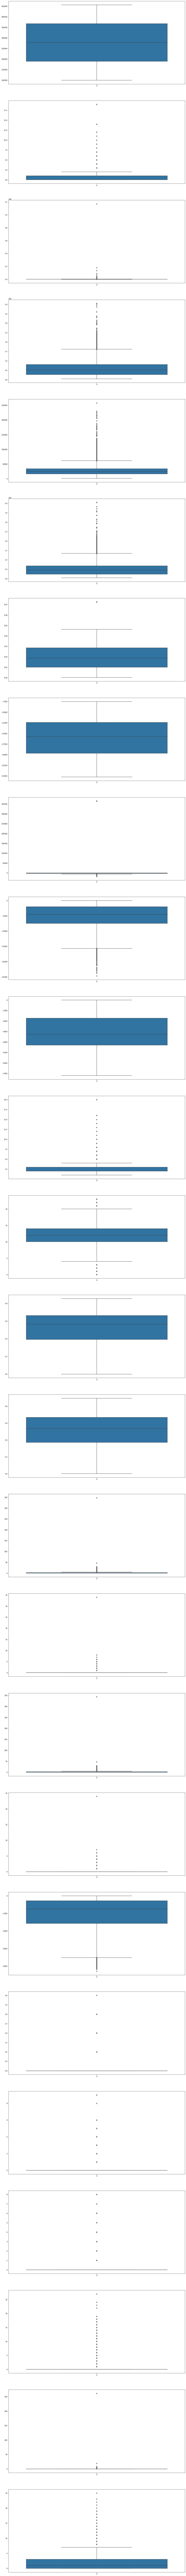

In [39]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(20, 300)
for i, col in enumerate(numerical_features):
    sns.boxplot(train_data[col], ax=axes[i])
plt.show()

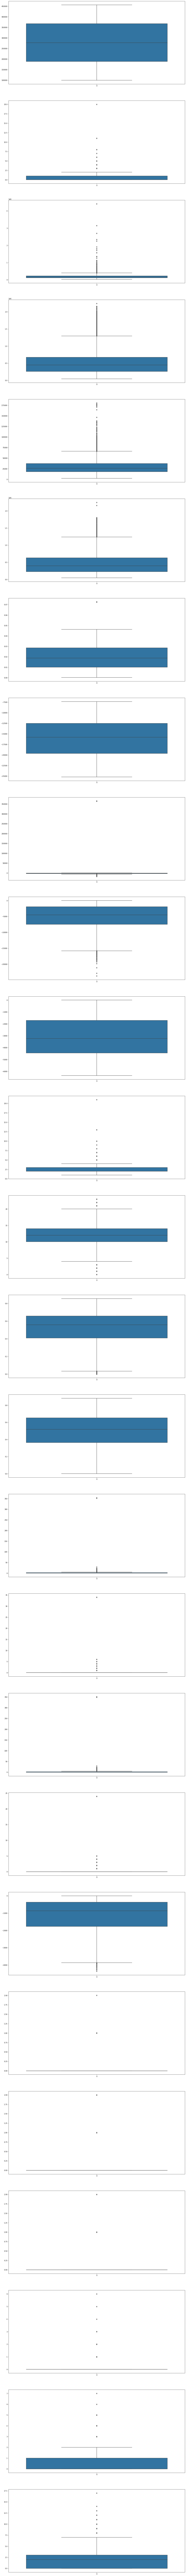

In [40]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(20, 300)
for i, col in enumerate(numerical_features):
    sns.boxplot(test_data[col], ax=axes[i])
plt.show()

### Лінійіні залежності

#### Correlation Matrix

<AxesSubplot:>

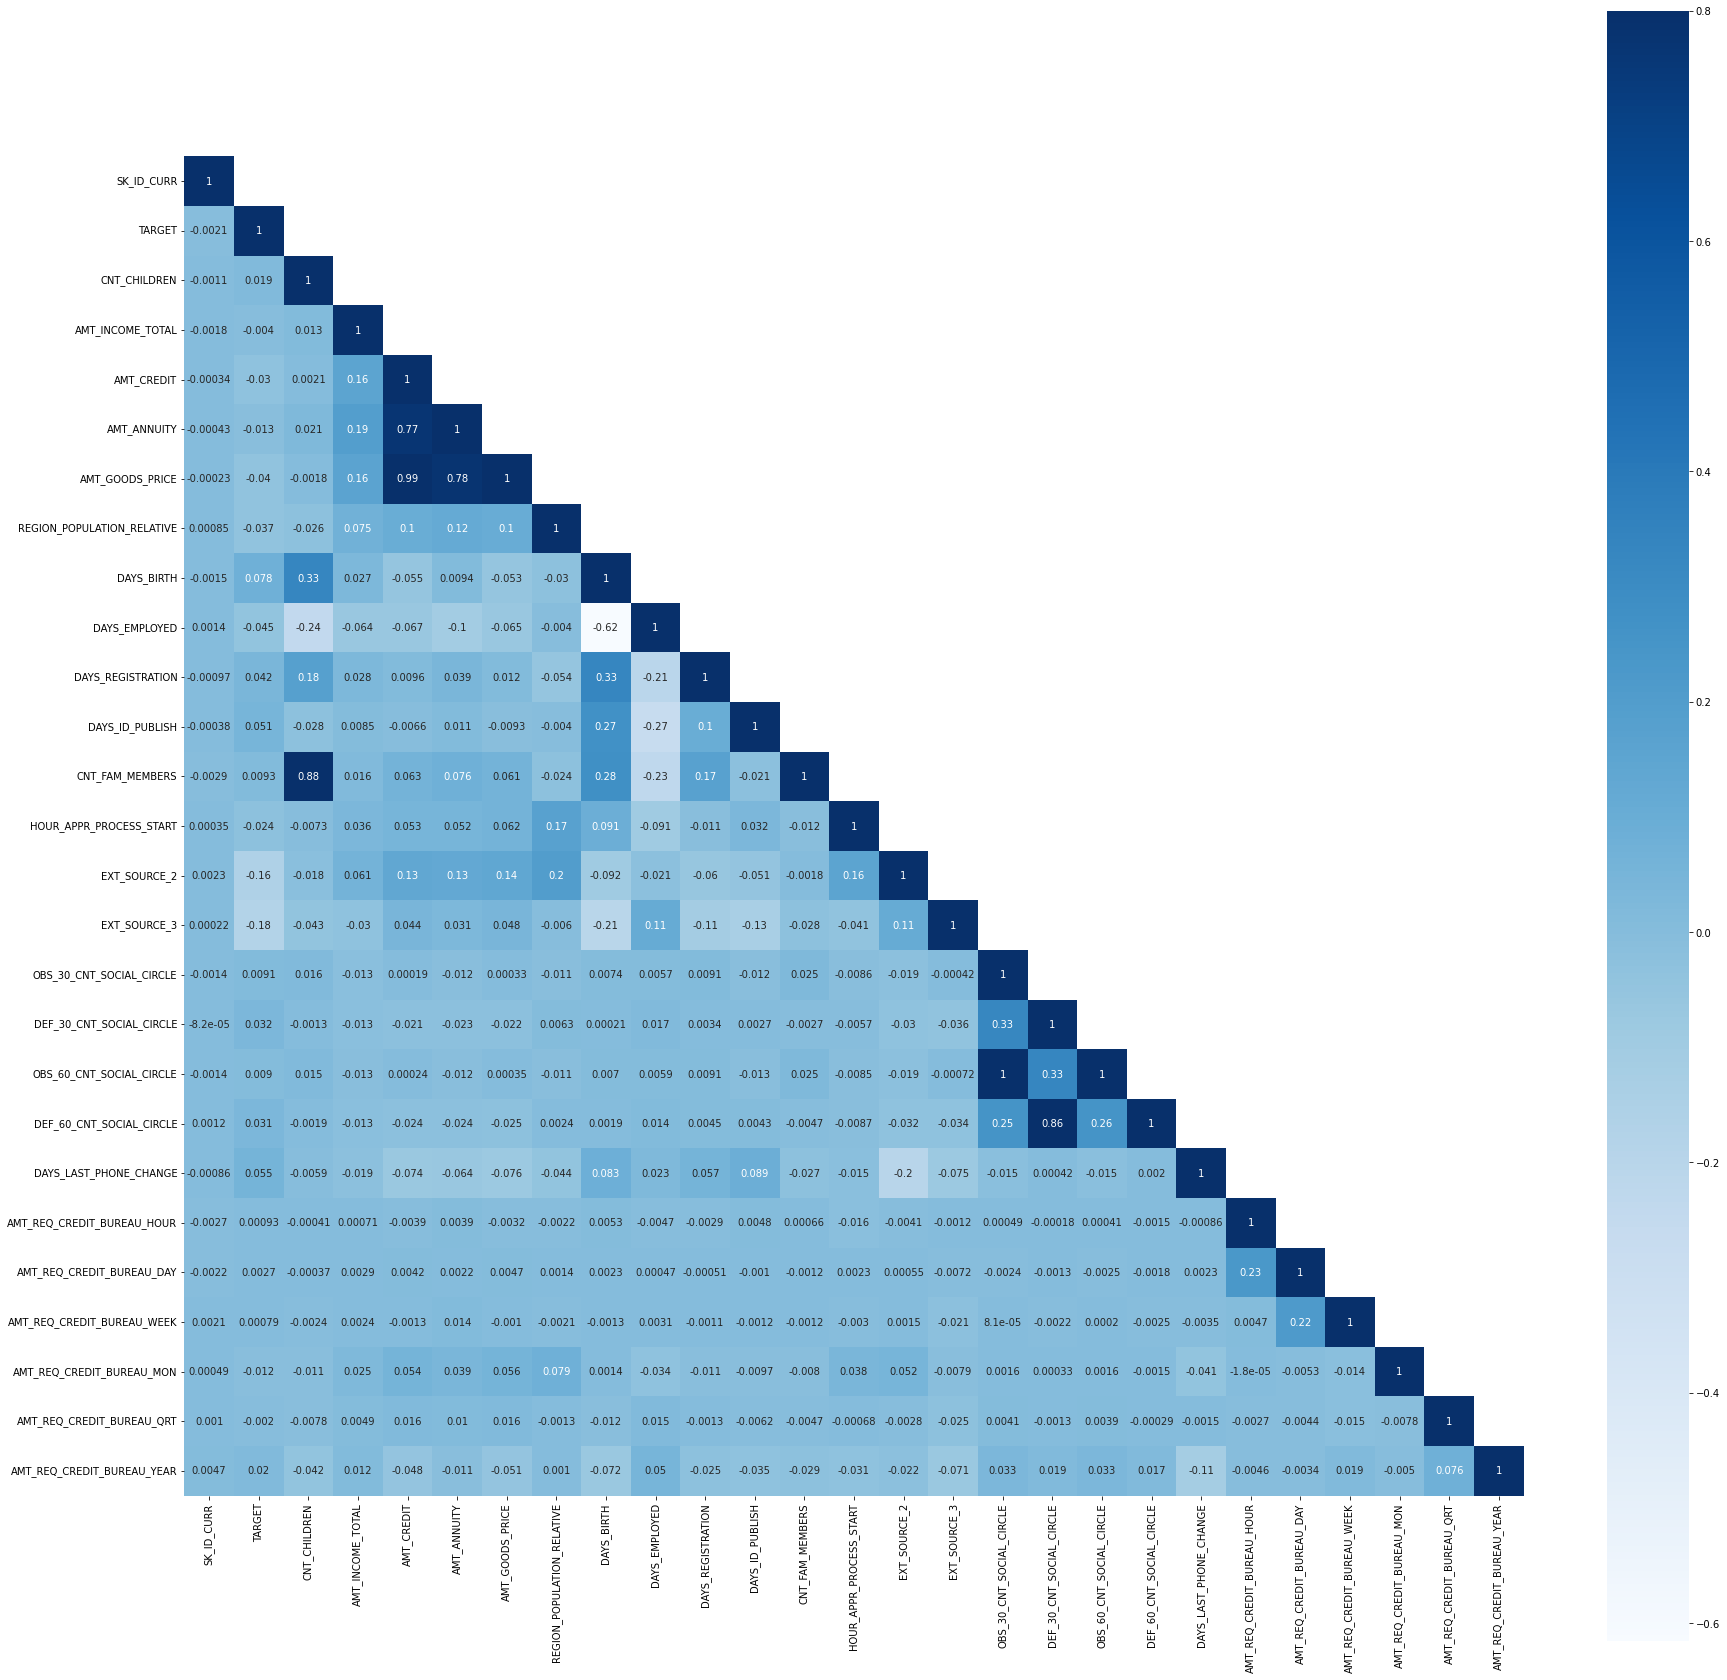

In [41]:
correlation_matrix =train_data.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
sns.heatmap(correlation_matrix,cmap="Blues", mask=mask, vmax=0.8, square=True, annot=True)

Бачиvо, що є фічі, що сильно кореельовані. позбавимося їх.

In [42]:
features_to_drop = ["CNT_FAM_MEMBERS","AMT_GOODS_PRICE","AMT_ANNUITY","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
train_data.drop(columns=features_to_drop, inplace=True)
test_data.drop(columns=features_to_drop, inplace=True)
train_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 67, dtype: object

In [58]:
features_to_drop_set = set(features_to_drop)
numerical_features_filtered = list(set(numerical_features) - features_to_drop_set)
numerical_features_filtered

['EXT_SOURCE_2',
 'AMT_INCOME_TOTAL',
 'SK_ID_CURR',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'DAYS_REGISTRATION',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'HOUR_APPR_PROCESS_START',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'REGION_POPULATION_RELATIVE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DAYS_ID_PUBLISH',
 'AMT_CREDIT',
 'DAYS_BIRTH']

### Класифікація

Preprocessing, balancing data and handling missing values (ті, що мають менше 20% пропущених значень)

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

y = train_data["TARGET"]

transformer = ColumnTransformer(
    transformers = [
        ("categorical", OneHotEncoder(), categorical_features),
        ("numerical", StandardScaler(), numerical_features_filtered)
    ],
     remainder="passthrough"
)


# Apply the preprocessing to the training data and balance the dataset + handle missing values
X_train = train_data.drop("TARGET", axis=1)
X_train_imputed = SimpleImputer(strategy="median").fit_transform(X_train[numerical_features_filtered])
X_train[numerical_features_filtered] = X_train_imputed
X_train_balanced, y_train_balanced = RandomOverSampler(random_state=42).fit_resample(transformer.fit_transform(X_train), y)


# Apply the preprocessing to the testing data
X_test = test_data[X_train.columns]
X_test_imputed = SimpleImputer(strategy="median").fit_transform(X_test[numerical_features_filtered])
X_test[numerical_features_filtered] = X_test_imputed
X_test = transformer.transform(X_test)

 # Split the balanced training data into training and validation sets
train_split_x, validate_x, train_split_y, validate_y = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

Класифікуємо:

In [77]:
model = LogisticRegression(class_weight = "balanced", max_iter=2500)
model.fit(train_split_x, train_split_y)
predictionTrain = model.predict(train_split_x)
validate = model.predict(validate_x)

print("Train data")
print("Accuracy: ", accuracy_score(train_split_y, predictionTrain))
print("ROC_AUC: ", roc_auc_score(train_split_y, predictionTrain))

print("Validation")
print("Accuracy: ", accuracy_score(validate_y, validate))
print("ROC_AUC: ", roc_auc_score(validate_y, validate))

Train data
Accuracy:  0.6784236906280607
ROC_AUC:  0.6784236387301261
Validation
Accuracy:  0.675923059915985
ROC_AUC:  0.675923271560964


In [79]:
predictionTest = model.predict(X_test)

Запис у файл

In [80]:
submission_df = pd.DataFrame({
    'SK_ID_CURR': test_data['SK_ID_CURR'],
    'TARGET': predictionTest
})
submission_df.to_csv('submission.csv', index=False)

Результат:

<img src="result.png">